Creo una densità uniforme

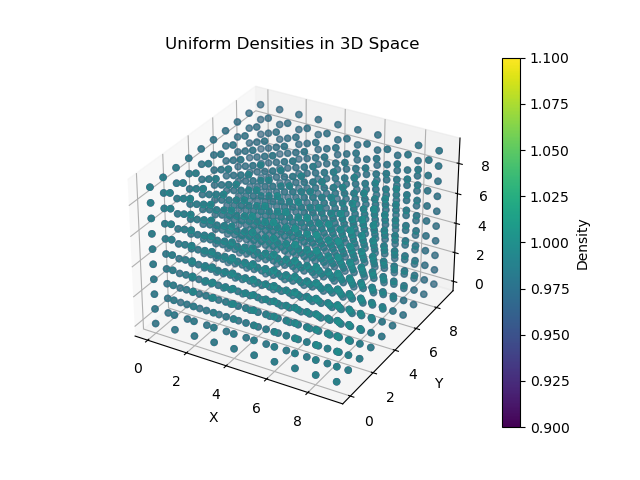

In [13]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define the step size
dx = 1  # Change this value to your desired step size

# densità uniforme
delta = 1

a = 0
b = 9

# Calculate the number of steps
num_steps = int((b - a) / dx) + 1


x = np.linspace(a, b, num_steps)

X, Y, Z = np.meshgrid(x, x, x)
D = np.full(X.shape, delta)


# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the densities
ax.scatter(X, Y, Z, c=D, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Uniform Densities in 3D Space')

# Add colorbar
cbar = plt.colorbar(ax.scatter(X, Y, Z, c=D, cmap='viridis'))
cbar.set_label('Density')

plt.show()



Calcolo la fast fourier trasform

(10, 10, 6)


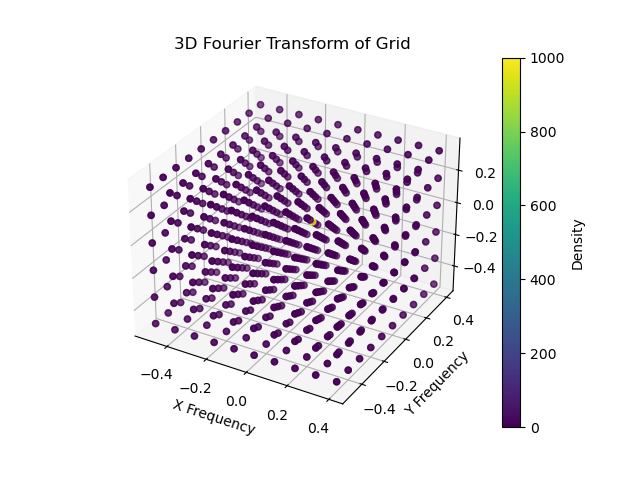

In [14]:
# Compute the Fourier transform
fourier_transform = np.fft.rfftn(D)
shape=fourier_transform.shape

print(shape)
freq_x=np.fft.fftfreq(shape[0],d=(x[1]-x[0]))
freq_y=np.fft.fftfreq(shape[1],d=(x[1]-x[0]))
freq_z=np.fft.fftfreq(shape[2],d=(x[1]-x[0]))


fX, fY, fZ = np.meshgrid(freq_x, freq_y, freq_z, indexing='ij')

# Plot the Fourier transform
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Get the magnitude of Fourier coefficients
magnitude = np.abs(fourier_transform)

# Plot magnitude without log scale
ax.scatter(fX.flatten(), fY.flatten(), fZ.flatten(), c=magnitude.flatten(), cmap='viridis')

ax.set_xlabel('X Frequency')
ax.set_ylabel('Y Frequency')
ax.set_zlabel('Z Frequency')
ax.set_title('3D Fourier Transform of Grid')

# Add colorbar
cbar = plt.colorbar(ax.scatter(fX.flatten(), fY.flatten(), fZ.flatten(), c=magnitude.flatten(), cmap='viridis'))
cbar.set_label('Density')

plt.show()

Calcolo power spectrum del segnale

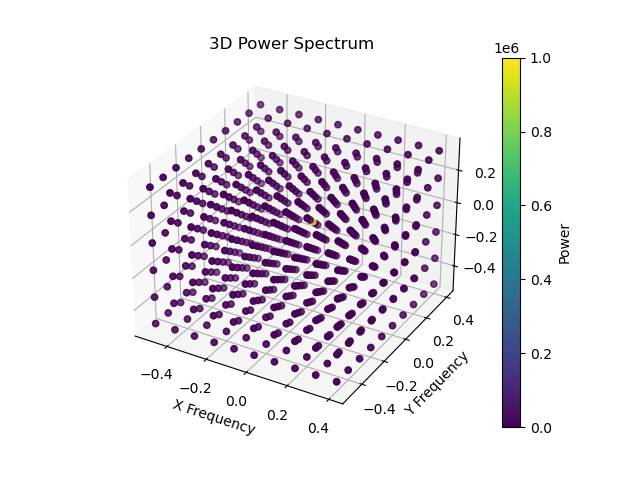

In [15]:
# Compute the power spectrum
power_spectrum = np.abs(fourier_transform)**2

# Normalise p.s.
nPS = power_spectrum#


# Plot the power spectrum
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot power spectrum
ax.scatter(fX.flatten(), fY.flatten(), fZ.flatten(), c=power_spectrum.flatten(), cmap='viridis')

ax.set_xlabel('X Frequency')
ax.set_ylabel('Y Frequency')
ax.set_zlabel('Z Frequency')
ax.set_title('3D Power Spectrum')

# Add colorbar
cbar = plt.colorbar(ax.scatter(fX.flatten(), fY.flatten(), fZ.flatten(), c=power_spectrum.flatten(), cmap='viridis'))
cbar.set_label('Power')

plt.show()


Istogramma del power spectrum

0.6981317007977318  < k <  6.283185307179586


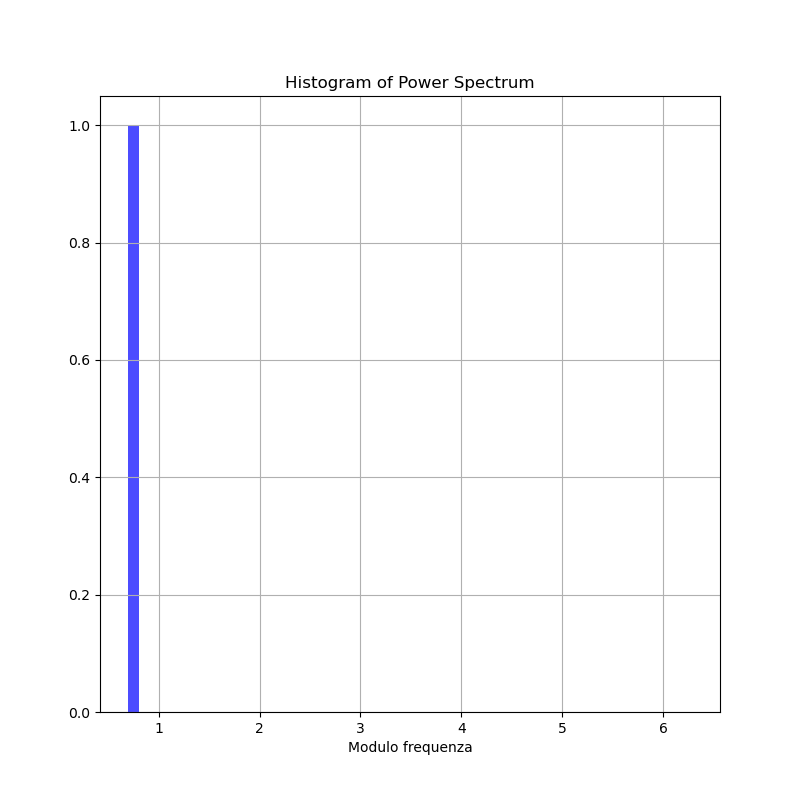

In [30]:
kmin = 2*np.pi/(b-a)
kmax = 2*np.pi/(x[1]-x[0])

print(kmin,' < k < ',kmax)

K_2 = fX.flatten()**2 + fY.flatten()**2 + fZ.flatten()**2

# Plot histogram of power spectrum
plt.figure(figsize=(8,8))
plt.title('Histogram of PS')
plt.hist(K_2, bins=50, range=(kmin, kmax), color='blue', alpha=0.7)
plt.xlabel('Modulo frequenza')
plt.ylabel('')
plt.title('Histogram of Power Spectrum')
plt.grid(True)
plt.show()
